## Decision Tree

Decision trees partition feature space into hyper volumes with similar features, subject to the goal of reducing variance or impurity in the target y variable.A decision tree is drawn upside down with its root at the top.Growing a tree involves deciding on which features to choose and what conditions to use for splitting, along with knowing when to stop.
For example, a regression of y against a single feature begins by finding the split point in x that gets two regions with the lowest average variance within those subregions.This is done by exhaustively testing locations in x space, computing the variance of y for observations to the left and the variance of observations on the right of the split point. The x location of the best average of these two variances is the split point. Then, the algorithm recursively splits the two new subregions.

The same process works for classification. The only difference is that, instead of measuring MSE (or variance), we measure and try to reduce the uncertainty/purity (gini impurity) of the y values to the left and right of the split.




A decision tree classifier is a binary tree where predictions are made by traversing the tree from root to leaf — at each node, we go left if a feature is less than a threshold, right otherwise. Finally, each leaf is associated with a class, which is the output of the predictor.

When moving beyond a single feature, during training, the decision tree must choose not only the split value but also the feature to test. Again, it exhaustively tries all combinations of features and feature values, looking for the lowest variance (regression) or highest purity (classification) to the left and right of the candidate split value. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

from sklearn import tree
from dtreeviz.trees import *
# from dtreeviz.shadow import ShadowDecTree

In [2]:
wine = load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


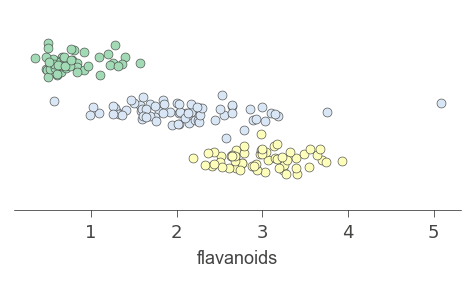

In [3]:
feature_names = list(wine.feature_names)
class_names = list(wine.target_names)
X = df_wine[['flavanoids']].values
y = wine.target

dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X, y)

fig, ax = plt.subplots(1,1, figsize=(4,1.8))
ct = ctreeviz_univar(dt, X, y,
                     feature_names = 'flavanoids',
                     class_names=class_names,
                     target_name='Wine',
                     nbins=40, gtype='strip',
                     fontsize=9,
                     show={},
                     colors={'scatter_marker_alpha':1, 'scatter_marker_alpha':1},
                     ax=ax)
plt.show()

# Gini Impurity 

Decision trees use the concept of Gini impurity to describe how homogeneous or “pure” a node is. A node is pure (G = 0) if all its samples belong to the same class, while a node with many samples from many different classes will have a Gini closer to 1.
More formally the Gini impurity of n training samples split across k classes is defined as
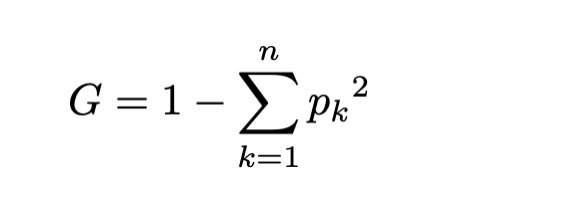

$$
I_G = \sum_{i=1}^k \sum_{j \neq i}^k P_j = 1 - \sum_{i=1}^{k} P_i^2
$$
where p[k] is the fraction of samples belonging to class k.

For example if a node contains five samples, with two of class Room 1, two of class Room 2, one of class Room 3 and none of class Room 4, then


In [4]:
G = 1.0 - ((0.4)**2 + (2/5)**2 + (1/5)**2)
G

0.6399999999999999

#### Using this function, what is the gini impurity for the overall y target

In [5]:
def gini(y):
    "See https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity"
    i, counts = np.unique(y, return_counts=True)
#     print(i,counts)
    
    n = len(y)
#     print(_, counts/n)
    return 1 - np.sum( (counts / n)**2)

In [6]:
gini(y)

0.6583133442747129

### Get all y values for rows where df_wine['flavanoids']<1.3 into variable lefty and >= into righty


In [7]:
lefty= y[df_wine['flavanoids']<1.3]
righty= y[df_wine['flavanoids']>=1.3]

In [8]:
lefty

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

#### As we can see most of the classes in the left are dominated by ones and two's 

# What are the gini values for left and right partitions?

In [9]:
gini(lefty), gini(righty), gini(y)

(0.2368319876970395, 0.529233058466117, 0.6583133442747129)

### Left partition is much more pure than right but right is still more pure than original gini(y). We can conclude that the split is worthwhile as the partition would let us give more accurate predictions. 

# Try with 2 variables

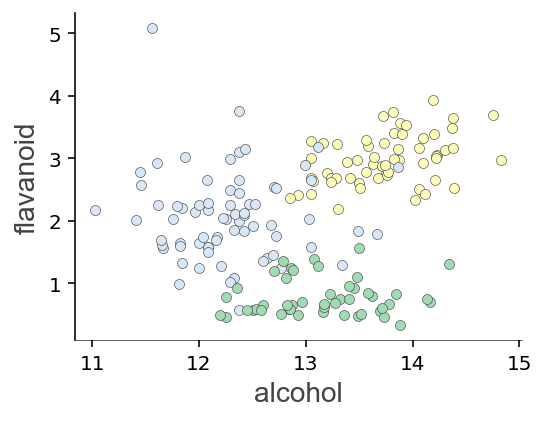

In [10]:
X = df_wine[['alcohol','flavanoids']].values
y = wine.target

dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X, y)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
ct = ctreeviz_bivar(dt, X, y,
                     feature_names = ['alcohol','flavanoid'], class_names=class_names,
                     target_name='iris',
                     show={},
                     colors={'scatter_marker_alpha':1, 'scatter_marker_alpha':1},
                     ax=ax
                   )

## Q. Which variable and split point would you choose if you could only split once?


<details>
<summary>Solution</summary>
Because the blue dots are spread vertically, a horizontal split won't be very good. Hence, we should choose variable proline.  The best split will carve off the blue dots, leaving the yellow and green mixed up.  A split at proline=12.7 seems pretty good.
</details>

### Modify the code to view the splits and compare your answer

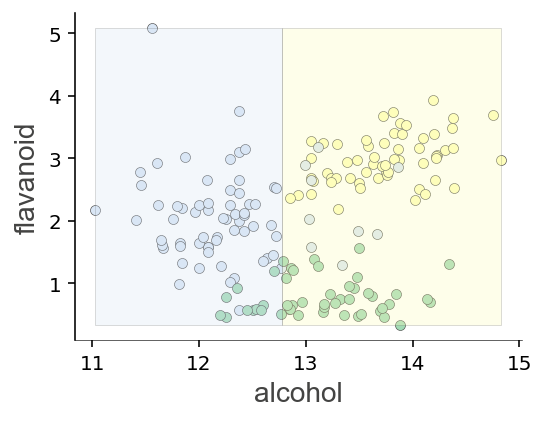

In [11]:
X = df_wine[['alcohol','flavanoids']].values
y = wine.target

dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X, y)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
ct = ctreeviz_bivar(dt, X, y,
                     feature_names = ['alcohol','flavanoid'], class_names=class_names,
                     target_name='iris',
                     show={'splits'},
                     colors={'scatter_marker_alpha':1, 'scatter_marker_alpha':1},
                     ax=ax
                   )

### Q. Which variable and split points would you choose next for depth=2?

<details>
<summary>Solution</summary>
Once we carve off most of the blue vertically, we should separate the yellow by choosing flavanoid=1.7 to split horizontally. NOTICE, however, that the 2nd split will not be across entire graph since we are splitting the region on the right.  Splitting on the left can be at flavanoid=1 so we isolate the green from blue on left.
</details>


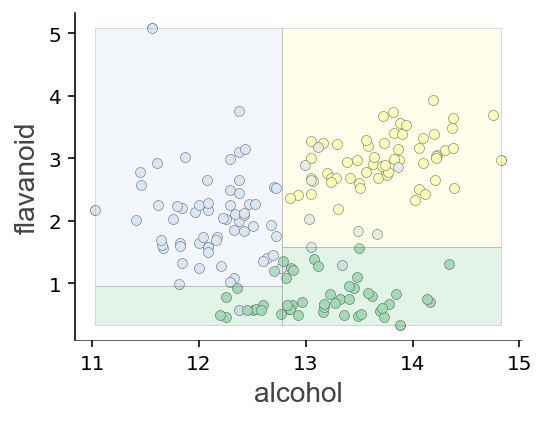

In [12]:
X = df_wine[['alcohol','flavanoids']].values
y = wine.target

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
ct = ctreeviz_bivar(dt, X, y,
                     feature_names = ['alcohol','flavanoid'], class_names=class_names,
                     target_name='iris',
                     show={'splits'},
                     colors={'scatter_marker_alpha':1, 'scatter_marker_alpha':1},
                     ax=ax
                   )

### Get all y values for rows where the split var is less than the split value into variable lefty and those >= into righty

In [13]:
lefty = y[df_wine['proline']<750] 
righty = y[df_wine['proline']>=750] 
righty.shape, lefty.shape

((71,), (107,))

In [14]:
gini(lefty), gini(righty), gini(y)

(0.4908725652895449, 0.33564768895060504, 0.6583133442747129)

In [15]:
1 - ((2/107)**2 + (65/107)**2 + (40/107)**2) # for the right one 

0.4908725652895449

The right partition is more pure than the left and the overall dataset 

# Finding the optimal feature and threshold

The key to the CART algorithm is finding the optimal feature and threshold such that the Gini impurity is minimized. To do so, we try all possible splits and compute the resulting Gini impurities.

how might we compute the Gini of all possible splits?

The first solution is to actually perform each split and compute the resulting Gini. Unfortunately this is slow, since we would need to look at all the samples to partition them into left and right. More precisely, it would be n splits with O(n) operations for each split, making the overall operation O(n²).

A faster approach is to 
1. iterate through the sorted feature values as possible thresholds,
2. keep track of the number of samples per class on the left and on the right, and 
3. increment/decrement them by 1 after each threshold. From them we can easily compute Gini in constant time.


Indeed if m is the size of the node and m[k] the number of samples of class k in the node, then


since after seeing the i-th threshold there are i elements on the left and m–i on the right,
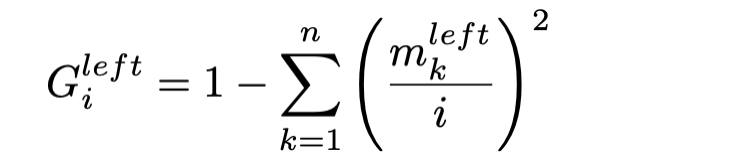

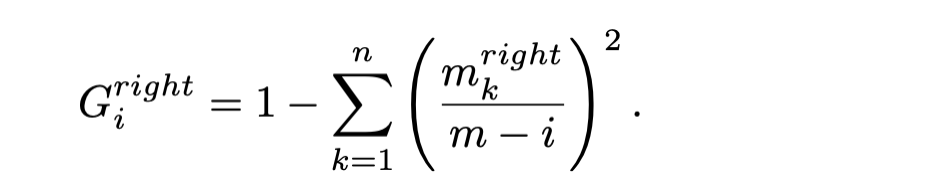

The resulting Gini is a simple weighted average:

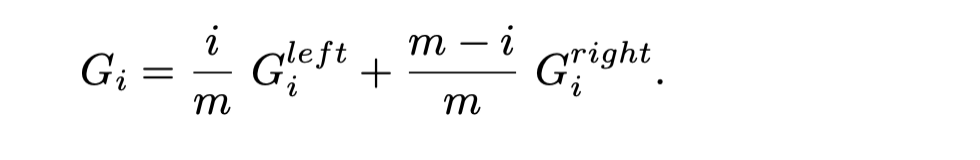

This process is called Information gain.

Information Gain, or IG for short, measures the reduction in entropy or surprise by splitting a dataset according to a given value of a random variable.


## Calculate information gain 

In [20]:
g_l= gini(lefty)
i = len(lefty)
g_r= gini(righty)
m = len(y)
g_l, g_r, m, i

(0.4908725652895449, 0.33564768895060504, 178, 107)

In [21]:
child = ((i)*g_l + ((m-i)*g_r))/178
Info_gain = gini(y) - child
Info_gain

0.22935631954732938

In [22]:
X= df_wine
y = wine.target
n_samples,num_features= X.shape

feat_idxs = np.random.choice(num_features, num_features, replace=False)
feat_idxs

array([11,  5,  6,  8,  1,  7, 12,  3,  0,  4, 10,  2,  9])

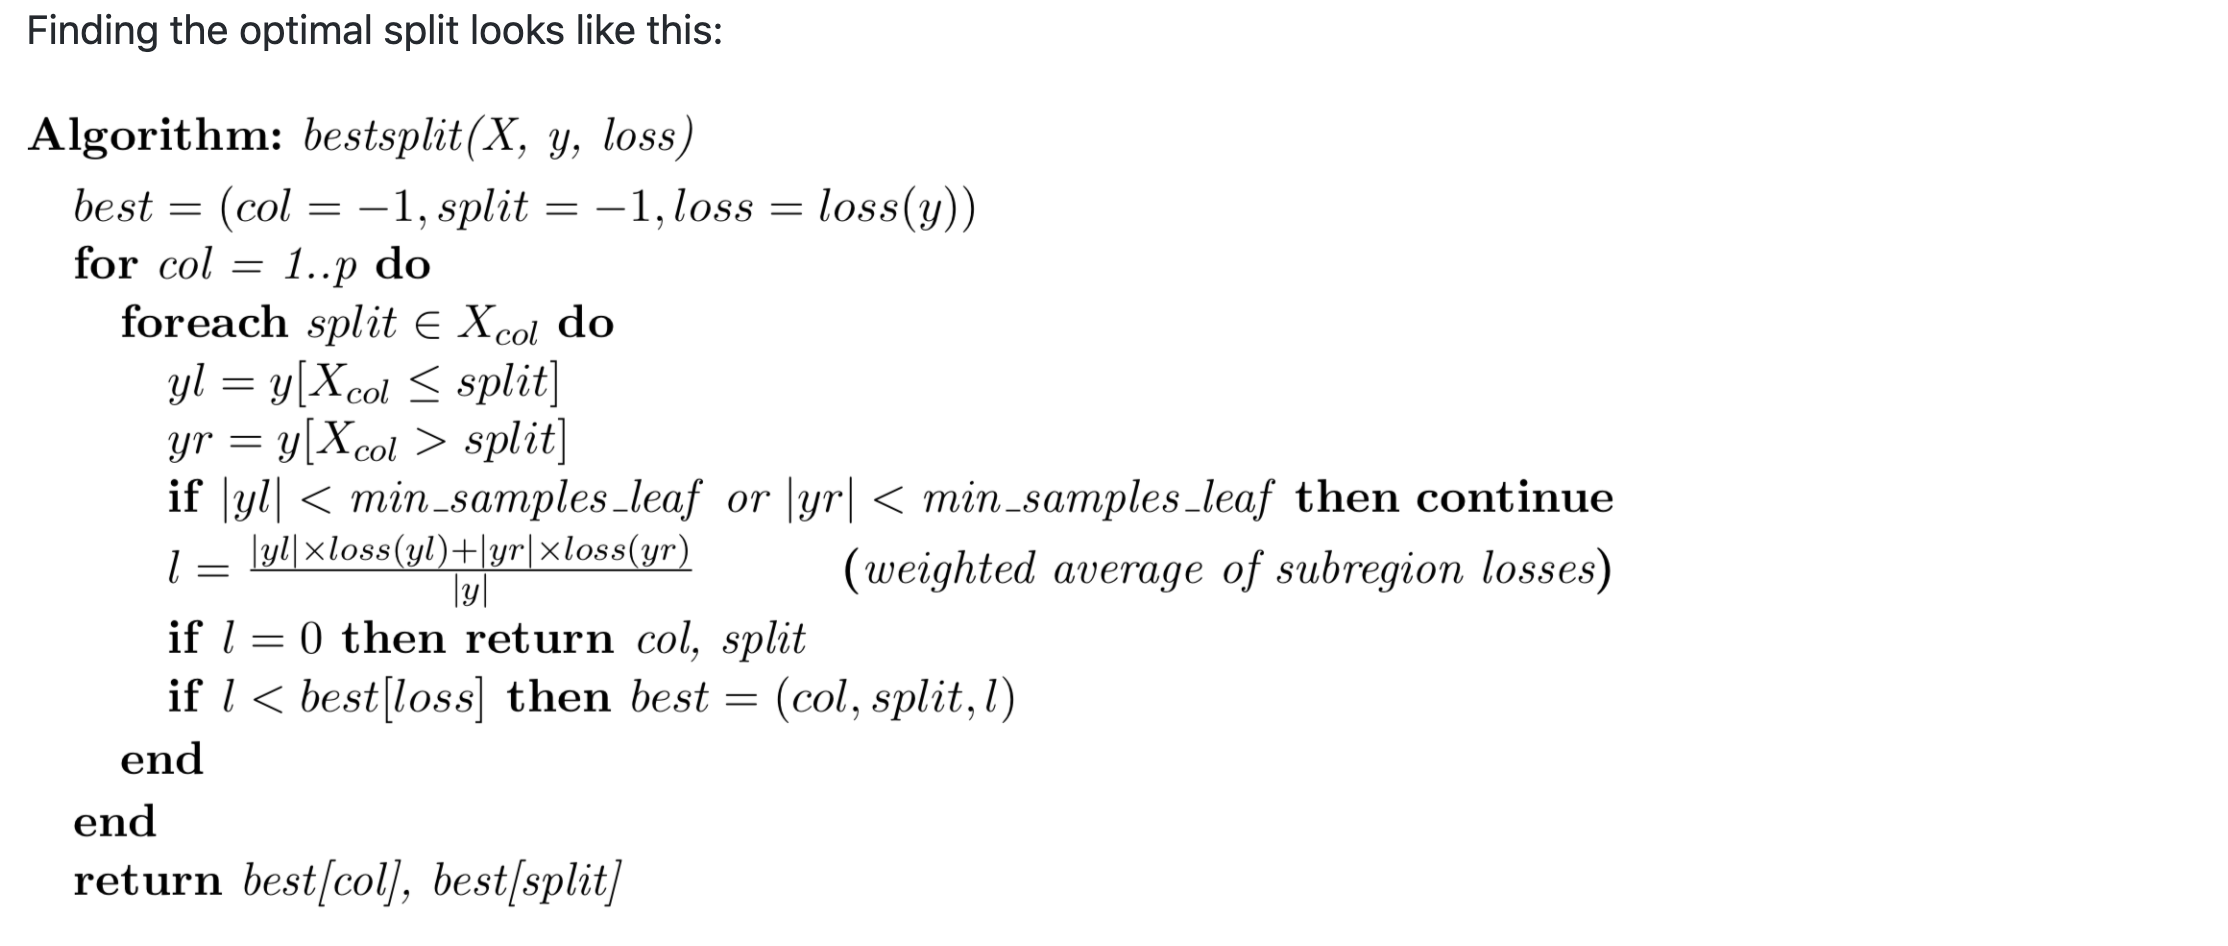

In [23]:
best_feature, best_split, best_gain = -1,-1,-1
min_samples_leaf = 1

for col in feat_idxs: # loop through the features 
    X_column = X.iloc[:, col]
    candidates = np.random.choice(X_column, 11, replace=False)
    candidates = np.unique(candidates)
#     print(candidates)
    for split in candidates:
        yl = y[X_column <= 0] # take y values to the left 
        yr = y[X_column > split] # take y values to the right 
        
        if len(yl) < min_samples_leaf or len(yr) < min_samples_leaf:
            continue
        
        parent_loss = gini(y)
        child_loss = (len(yl) * gini(yl) + len(yr) * gini(yr))/ len(y)
        
        l = parent_loss - child_loss
        if l == 0: 
            break
        if l > best_gain:
            best_gain = l
            print(best_gain)
            best_split = split
            print(best_split)
            best_feature = col
            print(best_feature)

In [33]:
def best_split(X,y):
    
    """Find the best split for a node.
    "Best" means that the average impurity of the two children, weighted by their
    population, is the smallest possible. Additionally it must be less than the
    impurity of the current node.
    To find the best split, we loop through all the features, and get random unique points from the training samples 
    as possible thresholds. We compute the Gini impurity of the split generated by that particular feature/threshold
    pair, and we compute the information gain return the pair with best information gain.
    
    Returns:
        best_idx: Index of the feature for best split, or None if no split is found.
        best_thr: Threshold to use for the split, or None if no split is found.
        """
    
    best_feature, best_split, best_gain = -1,-1,-1
    feat_idxs = np.random.choice(num_features, num_features, replace=False)
    
        
    for col in feat_idxs: #loop through all of the features 
        X_column = X[:, col]
        candidates = np.random.choice(X_column, 11, replace=True) # choose 11 points from each future randomly
        candidates = np.unique(candidates)
 
        for split in candidates: 
            yl = y[X_column <= split] # for each split get the values of y 
            yr = y[X_column > split] 

            if len(yl) < min_samples_leaf or len(yr) < min_samples_leaf:
                continue

            parent_loss = gini(y) # parent impurity 
  
            child_loss = (len(yl) * gini(yl) + len(yr) * gini(yr))/ len(y)
        
            l = parent_loss - child_loss
#             info_gain.append(l)
            if l == 0: 
                best_feature, best_split
            if l > best_gain:
                best_gain = l
                best_split = split
                best_feature = col
    return best_feature, best_split
best_split(X,y)

(12, 750.0)

# Build a Tree

### Creating the root node of the tree is easy.

We call the above get_split() function using the entire dataset.

Adding more nodes to our tree is more interesting.

Building a tree may be divided into 3 main parts:

1. Terminal Nodes.
2. Recursive Splitting.
3. Building a Tree.

### 1. Terminal Nodes.

We need to decide when to stop growing a tree.

We can do that using the depth and the number of rows that the node is responsible for in the training dataset.

#### Maximum Tree Depth.

This is the maximum number of nodes from the root node of the tree. Once a maximum depth of the tree is met, we must stop splitting adding new nodes. Deeper trees are more complex and are more likely to overfit the training data.

##### Minimum Node Records.
This is the minimum number of training patterns that a given node is responsible for. Once at or below this minimum, we must stop splitting and adding new nodes. Nodes that account for too few training patterns are expected to be too specific and are likely to overfit the training data.

#### Optimal split, very low impurity 
 It is possible to choose a split in which all rows belong to one group. In this case, we will be unable to continue splitting and adding child nodes as we will have no records to split on one side or another.

When we do stop growing at a given point, that node is called a terminal node and is used to make a final prediction.

This is done by taking the group of rows assigned to that node and selecting the most common class value in the group. This will be used to make predictions.

In [28]:
import numpy as np
from collections import Counter


class DecisionNode:

    def __init__(self, col=None, split=None, lchild=None, rchild=None,*, value=None):
        self.col = col
        self.split = split
        self.lchild = lchild
        self.rchild = rchild
        self.value = value
    def leaf_node(self):
        return self.value is not None


# 2. Recursive Splitting
We know how and when to create terminal nodes, now we can build our tree.

Building a decision tree involves calling the above developed get_split() function over and over again on the groups created for each node.

New nodes added to an existing node are called child nodes. A node may have zero children (a terminal node), one child (one side makes a prediction directly) or two child nodes. We will refer to the child nodes as left and right in the dictionary representation of a given node.

Once a node is created, we can create child nodes recursively on each group of data from the split by calling the same function again.

Below is a function that implements this recursive procedure. It takes a node as an argument as well as the maximum depth, minimum number of patterns in a node and the current depth of a node.

You can imagine how this might be first called passing in the root node and the depth of 1. This function is best explained in steps:

1. Firstly, the two groups of data split by the node are extracted for use and deleted from the node. As we work on these groups the node no longer requires access to these data.
2. Next, we check if either left or right group of rows is empty and if so we create a terminal node using what records we do have.
3. We then check if we have reached our maximum depth and if so we create a terminal node.
4. We then process the left child, creating a terminal node if the group of rows is too small, otherwise creating and adding the left node in a depth first fashion until the bottom of the tree is reached on this branch.
5. The right side is then processed in the same manner, as we rise back up the constructed tree to the root.
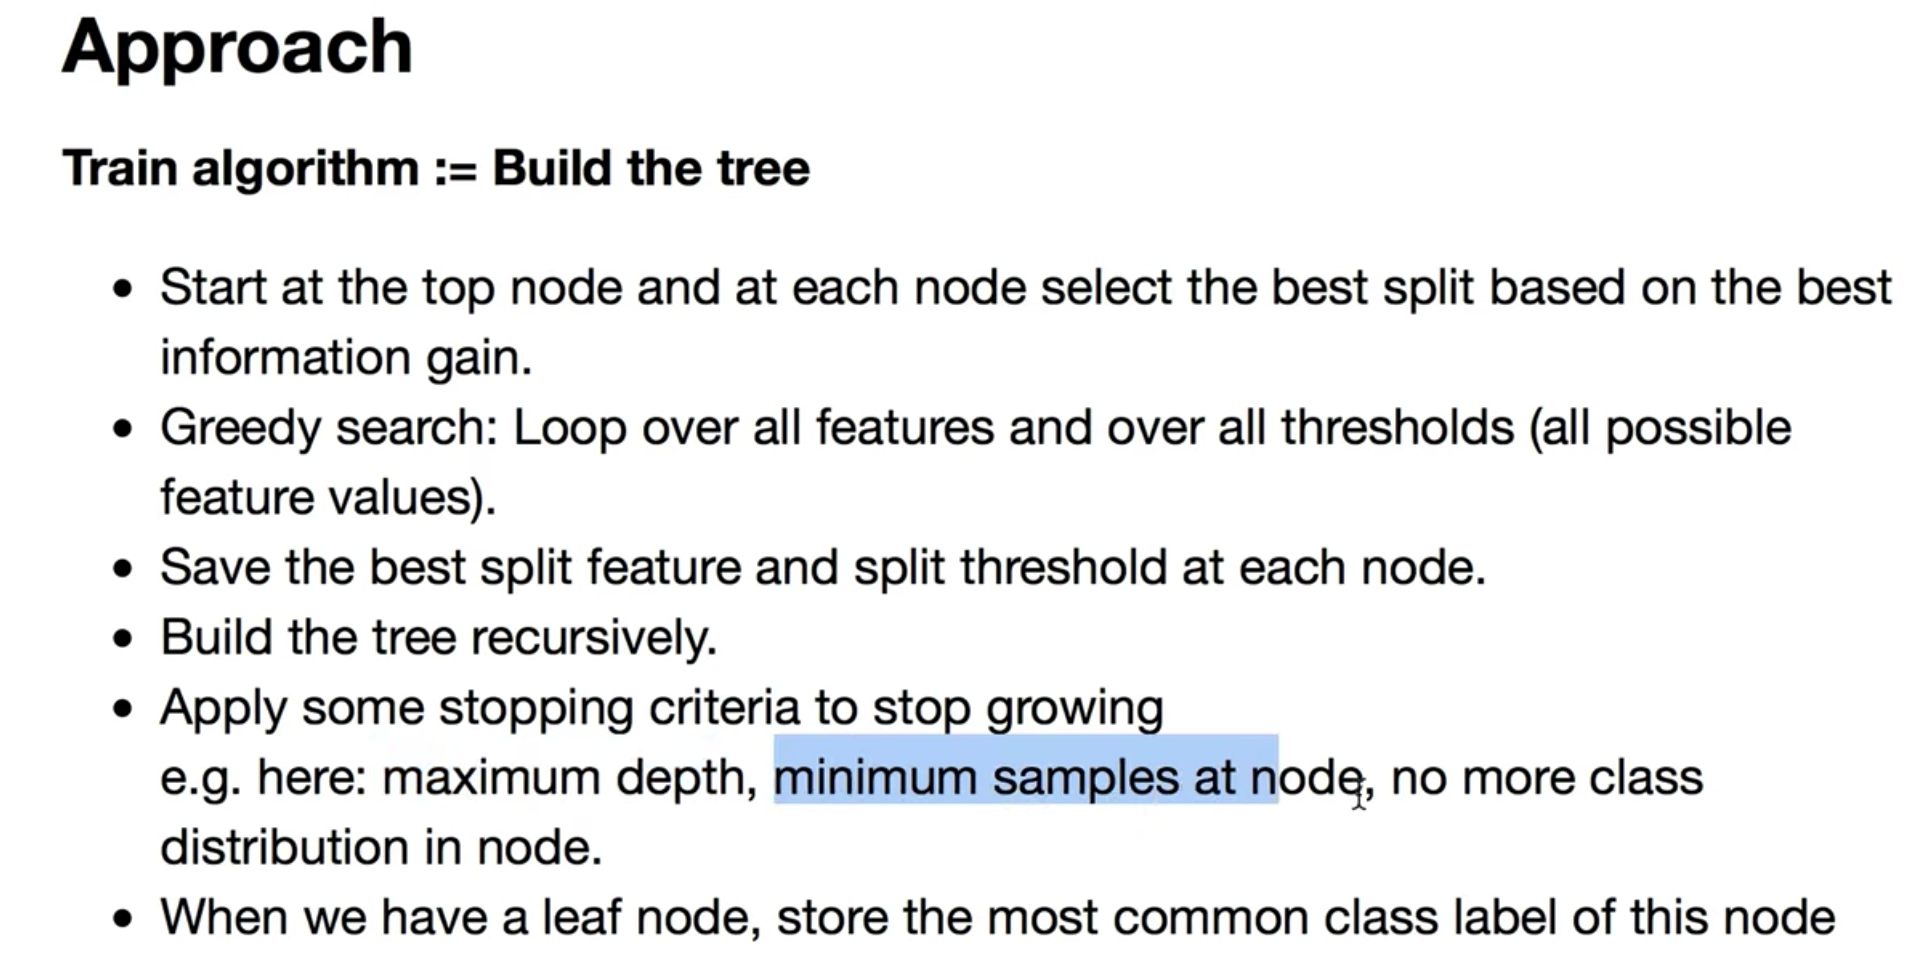

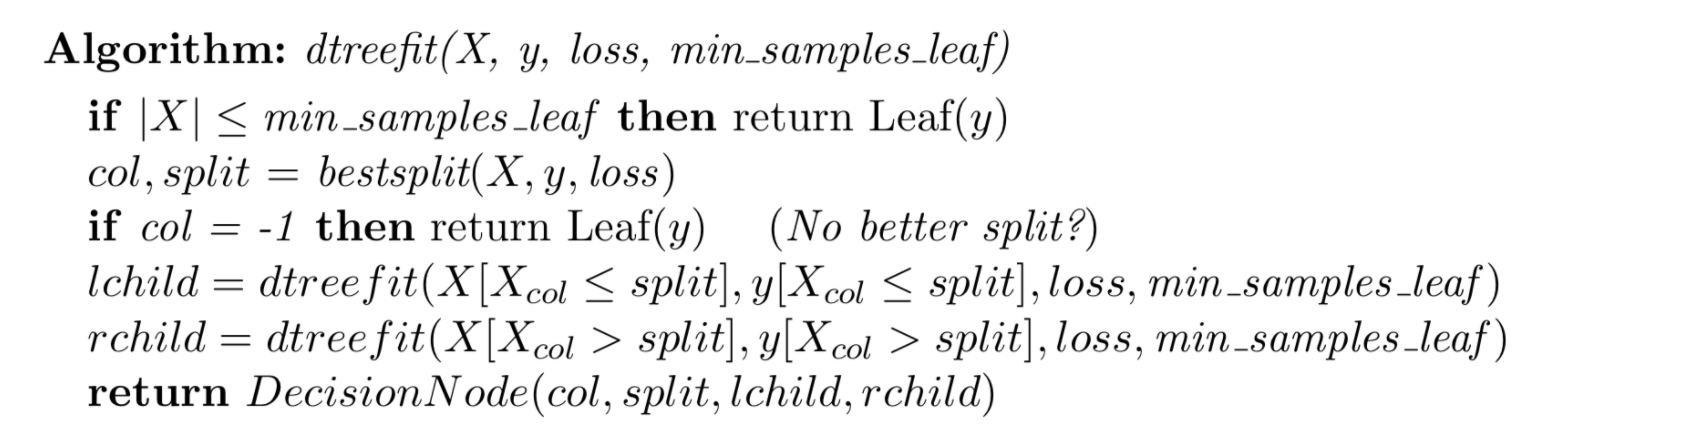

In [29]:

class DecsionTree:
    def __init__(self, min_samples_leaf=1, loss=None):
        self.min_samples_leaf = min_samples_leaf
        
    def fit(self, X,y):
        """
        Create a decision tree fit to (X,y) and save as self.root, the root of
        our decision tree, for either a classifier or regressor.  Leaf nodes for classifiers
        predict the most common class (the mode) and regressors predict the average y
        for samples in that leaf.  
              
        This function is a wrapper around fit_() that just stores the tree in self.root.
        """
        self.root = self.fit_(X,y, self.min_samples_leaf)
    
    def fit_(self,X,y, min_samples_leaf):
        """
        Recursively create and return a decision tree fit to (X,y) for
        either a classifier or regressor.  This function should call self.create_leaf(X,y)
        to create the appropriate leaf node, which will invoke either
        RegressionTree621.create_leaf() or ClassifierTree621. create_leaf() depending
        on the type of self.
        
        This function is not part of the class "interface" and is for internal use, but it
        embodies the decision tree fitting algorithm.

        (Make sure to call fit_() not fit() recursively.)
        """
        # Stoping Criteria
        samples, features = X.shape
        
        if samples <= min_samples_leaf:
            leaf = self.create_leaf(y)
            return DecisionNode(value=leaf)
        
        best_feat, split = best_split(X,y)
#         print(best_feat)
        if best_feat == -1:
            leaf = self.create_leaf(y)
            return DecisionNode(value=leaf)
        
        lchild = self.fit_(X[X[:, best_feat] <= split], y[X[:, best_feat] <= split], self.min_samples_leaf)
        rchild = self.fit_(X[X[:, best_feat] > split], y[X[:, best_feat] > split], self.min_samples_leaf)

        return DecisionNode(best_feat, split, lchild, rchild)
           
    def predict(self, X):
        """
        Making predictions with a decision tree involves navigating the tree with the specifically provided row of data.
        Again, we can implement this using a recursive function, where the same prediction routine is called again with 
        the left or the right child nodes, depending on how the split affects the provided data.
        Stopping criteria:
            We must check if a child node is either a terminal node for a value to be returned as the prediction, 
            or if it is a dictionary node containing another level of the tree to be considered.
        """
        return np.array([self.traverse_tree(x, self.root) for x in X])

    def traverse_tree(self, x, node):
        """ basecase in this case is leafnode and all we need is the value stored"""
        if node.leaf_node():
            return node.value

        if x[node.col] <= node.split: # check the input at specific nodes column and compare it with the split at the node
            return self.traverse_tree(x, node.lchild) # go to left child if less than threshold or go to right if > threshold 
        return self.traverse_tree(x, node.rchild)

    
class ClassifierTree621(DecsionTree):
    def __init__(self, min_samples_leaf=3):
        super().__init__(min_samples_leaf)

    def score(self, X_test, y_test):
        "Return the accuracy_score() of y_test vs predictions for each record in X_test"
        y_pred = self.predict(X_test)
        
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy
#     
#     def loss(self,y):
#         _, counts = np.unique(y, return_counts=True)
    
#         n = len(y)
#         return 1 - np.sum( (counts / n)**2 )
    
    def create_leaf(self, y):
        return np.bincount(y).argmax()
        

### 4. Make a Prediction
Making predictions with a decision tree involves navigating the tree with the specifically provided row of data.

Again, we can implement this using a recursive function, where the same prediction routine is called again with the left or the right child nodes, depending on how the split affects the provided data.

We must check if a child node is either a terminal value to be returned as the prediction, or if it is a dictionary node containing another level of the tree to be considered.



In [31]:
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=0.20)

dt = ClassifierTree621()
dt.fit(X_train, y_train)
print(dt.create_leaf(y))
score = dt.score(X_train, y_train)
print(score)
score = dt.score(X_test, y_test)
score

1
1.0


0.9722222222222222

# Interview Questions 

1. What is the approximate depth of a Decision Tree trained?

The depth of a well-balanced binary tree containing m leaves is equal to log2(m). A binary Decision Tree (one that makes only binary decisions, as is the case with all trees in Scikit-Learn) will end up more or less well balanced at the end of training, with one leaf per training instance if it is trained without restrictions. Thus, if the training set contains one million instances, the Decision Tree will have a depth of log2(106) ≈ 20 (actually a bit more since the tree will generally not be perfectly well balanced).

2. Is a node’s Gini impurity generally lower or greater than its parent’s? Is it generally lower/greater, or always lower/greater?

A node’s Gini impurity is generally lower than its parent’s. This is due to the CART training algorithm’s cost function, which splits each node in a way that minimizes the weighted sum of its children’s Gini impurities. However, it is possible for a node to have a higher Gini impurity than its parent, as long as this increase is more than compensated for by a decrease in the other child’s impurity.


3. If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

If a Decision Tree is overfitting the training set, it may be a good idea to decrease max_depth, since this will constrain the model, regularizing it.



4. If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

Decision Trees don’t care whether or not the training data is scaled or centered; that’s one of the nice things about them. So if a Decision Tree underfits the training set, scaling the input features will just be a waste of time.

5. If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?

The computational complexity of training a Decision Tree is O(n × m log(m)). So if you multiply the training set size by 10, the training time will be multiplied by K = (n × 10m × log(10m)) / (n × m × log(m)) = 10 × log(10m) / log(m). If m = 106, then K ≈ 11.7, so you can expect the training time to be roughly 11.7 hours.



6. If your training set contains 100,000 instances, will setting presort=True speed up training?

Presorting the training set speeds up training only if the dataset is smaller than a few thousand instances. If it contains 100,000 instances, setting presort=True will considerably slow down training.



7. what is the exact difference in gini impurity or Entropy? when should we use either of them?

Both checks how pure the split is in a decsion tree.
Gini Index has values inside the interval [0, 0.5] whereas the interval of the Entropy is [0, 1]. Gini impurity is computationaly less expensive.Computationally, entropy is more complex since it makes use of logarithms and consequently, the calculation of the Gini Index will be faster.

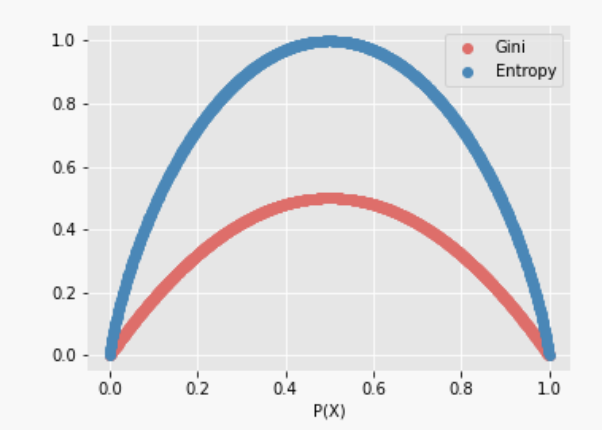